# Analysis of potential confounding factors by Principal Component Analysis

## The goal of this homework is to discover structure in an unlabeled dataset. The observations in this dataset belong to several different clusters. The specific goal is to identify how many clusters there are and to which cluster each point belongs.

In [20]:
# importing working libraries

import matplotlib.pyplot as plt # a library for plotting
#import matplotlib
from sklearn import preprocessing
import pandas as pd # pandas
import numpy as np
%matplotlib inline

#Importing dity dataset

datafile = 'tidy/imputed_data.csv' 
datafile2 = 'raw/pcbil_clinicaldata.csv'
#Reading dataset

df = pd.read_csv(datafile) # read data from file 'dataset.cvs'
fd = pd.read_csv(datafile2)
#Let's check the shape of the data



df.shape

(417, 28)

In [21]:
#Let's give a look to the first few rows of the dataframe

df.head()

,ck5,ck7,ck17,ck18,ck19,ck20,vim,muc1,muc2,muc5ac,...,wt1cyt,cdx2,p53,p63,ki67,chra,cd56,cd10,clinical_diagnosis,ID
0,0.000000,92.5,20.000000,92.5,92.5,0.0,5.0,20.0,0.0,80.0,...,0.0,20.0,10.0,0.000000,20.0,0.000000,0.0000,0.000000,Ductal pancreatic adenocarcinoma,Pancreas Ac|397
1,0.000000,20.0,0.000000,92.5,50.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,30.0,0.000000,0.0000,0.000000,Hepatocellular carcinoma,Hepatocellular Cancer|190
2,0.000000,92.5,0.000000,92.5,92.5,20.0,0.0,40.0,0.0,80.0,...,0.0,70.0,80.0,0.142857,40.0,0.833333,0.0000,0.000000,Ductal pancreatic adenocarcinoma,Pancreas Ac|25
3,0.714286,70.0,18.333333,92.5,85.0,5.0,15.0,80.0,0.0,40.0,...,0.0,40.0,95.0,2.142857,30.0,0.000000,10.0000,9.166667,Gallbladder cancer,Gallbladder Ac|108
4,0.000000,0.0,0.000000,92.5,40.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,10.0,0.000000,11.5625,0.000000,Hepatocellular carcinoma,Hepatocellular Cancer|336


In [46]:
fd.head()

,ID,person_number_anon,date_birth,gender,chemo,date_pad,type_probe,p_r,p_t,p_n,p_m,p_l,p_v,p_pn,date_death,comments
0,Ampulla Ac|124,PN1,3/5/1936,m,y,4/26/2005,r,0.0,3,1,NaN,NaN,NaN,NaN,4/13/2007,NaN
1,Ampulla Ac|173,PN2,11/10/1939,m,y,1/21/2010,r,0.0,1,0,x,1,0,NaN,8/30/2012,NaN
2,Ampulla Ac|177,PN3,5/27/1917,f,NaN,9/20/2005,b,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5/28/2006,NaN
3,Ampulla Ac|200,PN4,5/29/1932,f,n,2/9/2012,b,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12/16/2012,NaN
4,Ampulla Ac|225,PN5,11/23/1936,m,n,4/18/2011,r,0.0,2,0,x,1,0,NaN,8/14/2011,NaN


In [22]:

ndf=new = fd[['ID', 'type_probe']].copy()

df_merge= pd.merge(df, ndf, on='ID')

#Checking for missing values after merging both dataframes
df_merge.isnull().sum()



ck5                   0
ck7                   0
ck17                  0
ck18                  0
ck19                  0
ck20                  0
vim                   0
muc1                  0
muc2                  0
muc5ac                0
muc6                  0
berep4                0
ema                   0
mcea                  0
pcea                  0
ca125                 0
ca19.9                0
maspin                0
wt1cyt                0
cdx2                  0
p53                   0
p63                   0
ki67                  0
chra                  0
cd56                  0
cd10                  0
clinical_diagnosis    0
ID                    0
type_probe            0
dtype: int64

In [5]:
#Check dimensions of new dataframe. Only rows with common IDs are kept
df_merge.shape

(391, 29)

In [6]:
#Let's give a look to the first few rows of the dataframe

df_merge.head()

,ID,ck5,ck7,ck17,ck18,ck19,ck20,vim,muc1,muc2,...,wt1cyt,cdx2,p53,p63,ki67,chra,cd56,cd10,clinical_diagnosis,type_probe
0,Pancreas Ac|397,0.000000,92.5,20.000000,92.5,92.5,0.0,5.0,20.0,0.0,...,0.0,20.0,10.0,0.000000,20.0,0.000000,0.0000,0.000000,Ductal pancreatic adenocarcinoma,b
1,Hepatocellular Cancer|190,0.000000,20.0,0.000000,92.5,50.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,30.0,0.000000,0.0000,0.000000,Hepatocellular carcinoma,b
2,Pancreas Ac|25,0.000000,92.5,0.000000,92.5,92.5,20.0,0.0,40.0,0.0,...,0.0,70.0,80.0,0.142857,40.0,0.833333,0.0000,0.000000,Ductal pancreatic adenocarcinoma,r
3,Gallbladder Ac|108,0.714286,70.0,18.333333,92.5,85.0,5.0,15.0,80.0,0.0,...,0.0,40.0,95.0,2.142857,30.0,0.000000,10.0000,9.166667,Gallbladder cancer,r
4,Hepatocellular Cancer|336,0.000000,0.0,0.000000,92.5,40.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,10.0,0.000000,11.5625,0.000000,Hepatocellular carcinoma,r


## Performing principal component analysis (PCA) on the dataset by anatomical diagnosis

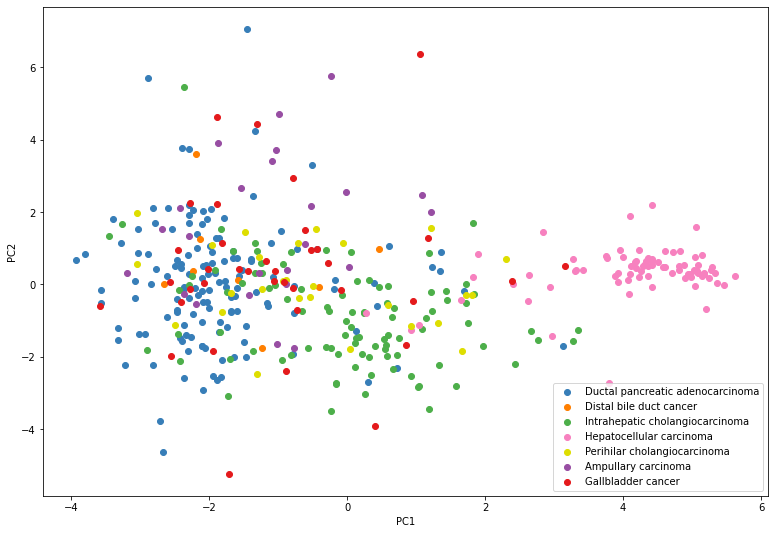

In [24]:
# Importing the PCA class
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

#Selecting only the numerical features to normalize

x= df.iloc[:,0:26]

# Creating the the scaler/normalization object
scaler = StandardScaler()

# fitting the model (estimates the mean and variance for each feature of our dataset)
scaler.fit( x)

#apply the fitted model to scale the data (in this case, 
#  that means subtract the mean and divide by the standard deviation)
df2 = scaler.transform( x)

#'df2' will be our standarized dataset to preform PCA analysis on

#create PCA model
pca = PCA(n_components=7) #Seven tumors tumor types classified based on the anatomical site of origin

# solve for PCs
pca.fit(df2)

# transform the data to the new PC coordinate system
df_pca = pca.transform(df2 )
'principal component 3','principal component 2'
pca_Df = pd.DataFrame(data =df_pca, columns = ['principal component 1', 'principal component 2',
'principal component 3','principal component 4','principal component 5','principal component 6','principal component 7'])

#Grouping the clinical diagnosis as a set

set_of_diagnosis = set( df['clinical_diagnosis'] ) # get rid of duplicates in the clinical diagnosis column


# Assigning a color for each element in the clinical diagnosis set 

colors= ('#377eb8', '#ff7f00', '#4daf4a', '#f781bf', '#dede00', '#984ea3', '#e41a1c')

# 5. Plotting the first two components

for diag,color in zip(set_of_diagnosis,colors):
    indicesToKeep = df['clinical_diagnosis'] == diag
    plt.scatter(pca_Df.loc[indicesToKeep, 'principal component 1'], pca_Df.loc[indicesToKeep, 'principal component 2'], c=color)
plt.gcf().set_size_inches(13, 9)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(set_of_diagnosis,loc="lower right")

plt.savefig('byanatomicalmarkers.png')

In [25]:
#Calculate the percentage of each anatomically-classified tumor types that gets attributed to a particular cluster.

df3=df.groupby(['clinical_diagnosis','clusters']).size().reset_index().rename(columns={0:'count'}).sort_values('clusters')

#Calculating the total of counts attributed to each cluster
total = df3.groupby('clusters')['count'].sum().rename('cluster total counts')

#Adding a new column 'total of counts' where the total of counts appears paired up with the corresponding cluster

df3 = df3.join(total, on='clusters', lsuffix='')

#Calculating the percentage of each anatomical diagnosis that gets attributed to a cluster
df3['count_pct_cluster'] = df3['count']/df3['cluster total counts']*100
df3.sort_values('clinical_diagnosis')

KeyError: 'clusters'

In [ ]:
Performing principal component analysis (PCA) on the dataset by type of probe

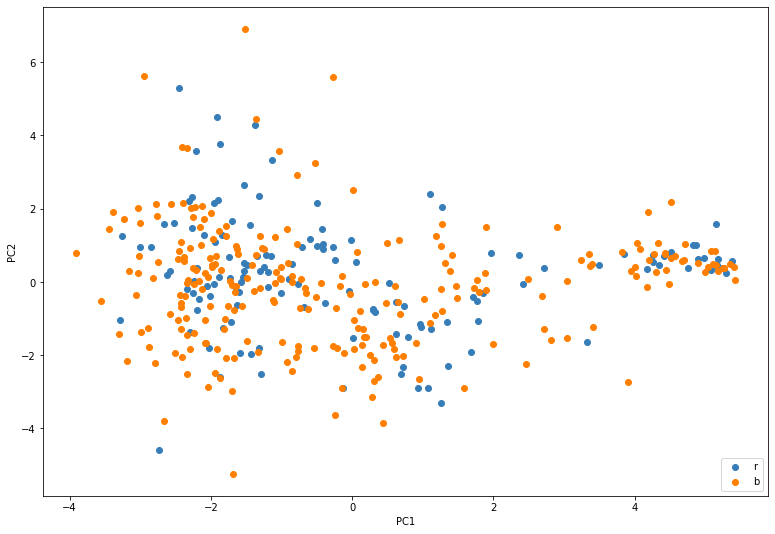

In [10]:
# Importing the PCA class
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

#Selecting only the numerical features to normalize

y= df_merge.iloc[:,1:27]

# Creating the the scaler/normalization object
scaler = StandardScaler()

# fitting the model (estimates the mean and variance for each feature of our dataset)
scaler.fit( y)

#apply the fitted model to scale the data (in this case, 
#  that means subtract the mean and divide by the standard deviation)
df_merge2 = scaler.transform( y)

#'df_merge2' will be our standarized dataset to preform PCA analysis on

#create PCA model
pca = PCA(n_components=2) #Two types of probes

# solve for PCs
pca.fit(df_merge2)

# transform the data to the new PC coordinate system
df_pca2 = pca.transform(df_merge2 )

pca_Df2 = pd.DataFrame(data =df_pca2, columns = ['principal component 1', 'principal component 2'])

#Grouping the clinical diagnosis as a set

set_of_probes = set( df_merge['type_probe'] ) # get rid of duplicates in the type probe column


# Assigning a color for each element in the clinical diagnosis set 

colors2= ('#377eb8', '#ff7f00')

# 5. Plotting the first two components

for probe,color in zip(set_of_probes,colors2):
    indicesToKeep = df_merge['type_probe'] == probe
    plt.scatter(pca_Df2.loc[indicesToKeep, 'principal component 1'], pca_Df2.loc[indicesToKeep, 'principal component 2'], c=color)
plt.gcf().set_size_inches(13, 9)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(set_of_probes,loc="lower right")

plt.savefig('byprobe.png')


### End of the PCA analysis